# Calculate PSI for colonies using buffer (3 km) [25 August 2020]

## Import modules, set constants

In [1]:
import os
import pickle
from importlib import reload
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, box
import spatial_index_utils
from spatial_index_utils import reproject_gdf, calc_all_services_buffer

reload(spatial_index_utils)

# WGS 84 / Delhi
epsg_code = 7760

# size of max buffer: 1km = 1000 meters
buffer_size = 3000

## Import colonies shapefile

In [2]:
with open('colonies_touch_nbrs25Aug2020.pkl', 'rb') as f:
    colonies = pickle.load(f)
    
colonies.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,geometry,area_km2,canal,railway,drain,barrier,centroid,ndmc_dist_km,population,nbrs_touch,nbrs_dist_touch,index
0,NEW DELHI 36,5584,None,Planned,"POLYGON Z ((1020282.788 996796.773 0.000, 1020...",1.966739,False,True,False,True,POINT (1020123.175 995898.851),5.159809,3570.060984,"[5598, 5599, 5602, 5603, 5605, 3491, 3508, 377...","[(5598, 1.074790368771482), (5599, 1.015506410...",0
1,NEW DELHI 35,5585,None,Planned,"POLYGON Z ((1019724.475 994932.797 0.000, 1019...",0.036429,False,False,False,False,POINT (1019673.024 994869.699),6.273149,323.028887,"[5586, 5594]","[(5586, 0.35712228070675794), (5594, 0.6299162...",1
2,NEW DELHI 34,5586,None,Planned,"POLYGON Z ((1019571.955 994876.019 0.000, 1019...",0.230739,False,False,False,False,POINT (1019485.484 994565.783),6.618792,2215.206473,"[5585, 5587, 5594, 5596]","[(5585, 0.35712228070675794), (5587, 0.3138054...",2
3,NEW DELHI 33,5587,None,Planned,"POLYGON Z ((1019352.702 994352.546 0.000, 1019...",0.281195,False,False,False,False,POINT (1019171.868 994576.688),6.709542,3956.166944,"[5586, 5588, 5596]","[(5586, 0.3138054943365384), (5588, 0.38643264...",3
4,NEW DELHI 32,5588,None,Planned,"POLYGON Z ((1018793.292 994224.182 0.000, 1018...",0.301253,False,False,False,False,POINT (1018785.675 994590.275),6.839299,3961.943378,"[5587, 5596, 5620, 5621]","[(5587, 0.3864326417184364), (5596, 0.62727257...",4


In [3]:
colonies = colonies.drop(columns=['canal', 'railway', 'drain', 'barrier', 'nbrs_touch', 'nbrs_dist_touch'])

In [4]:
colonies.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,geometry,area_km2,centroid,ndmc_dist_km,population,index
0,NEW DELHI 36,5584,None,Planned,"POLYGON Z ((1020282.788 996796.773 0.000, 1020...",1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0
1,NEW DELHI 35,5585,None,Planned,"POLYGON Z ((1019724.475 994932.797 0.000, 1019...",0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1
2,NEW DELHI 34,5586,None,Planned,"POLYGON Z ((1019571.955 994876.019 0.000, 1019...",0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2
3,NEW DELHI 33,5587,None,Planned,"POLYGON Z ((1019352.702 994352.546 0.000, 1019...",0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3
4,NEW DELHI 32,5588,None,Planned,"POLYGON Z ((1018793.292 994224.182 0.000, 1018...",0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4


In [5]:
colonies.crs

<Projected CRS: EPSG:7760>
Name: WGS 84 / Delhi
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: India - Delhi
- bounds: (76.83, 28.4, 77.34, 28.89)
Coordinate Operation:
- name: Delhi NSF LCC
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Create buffer and set this to new geometry

In [6]:
colonies['buffer'] = colonies.buffer(distance=buffer_size)

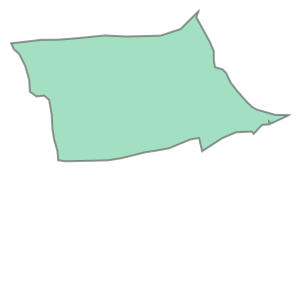

In [7]:
colonies['geometry'][1000]

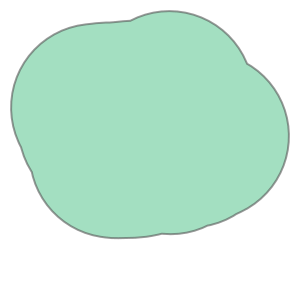

In [8]:
colonies['buffer'][1000]

In [9]:
colonies.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,geometry,area_km2,centroid,ndmc_dist_km,population,index,buffer
0,NEW DELHI 36,5584,None,Planned,"POLYGON Z ((1020282.788 996796.773 0.000, 1020...",1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0,"POLYGON ((1016607.226 994980.130, 1016603.289 ..."
1,NEW DELHI 35,5585,None,Planned,"POLYGON Z ((1019724.475 994932.797 0.000, 1019...",0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1,"POLYGON ((1016568.711 994871.252, 1016568.392 ..."
2,NEW DELHI 34,5586,None,Planned,"POLYGON Z ((1019571.955 994876.019 0.000, 1019...",0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2,"POLYGON ((1019608.922 991166.586, 1019597.475 ..."
3,NEW DELHI 33,5587,None,Planned,"POLYGON Z ((1019352.702 994352.546 0.000, 1019...",0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3,"POLYGON ((1017413.995 991690.161, 1017380.699 ..."
4,NEW DELHI 32,5588,None,Planned,"POLYGON Z ((1018793.292 994224.182 0.000, 1018...",0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4,"POLYGON ((1015584.462 994514.370, 1015575.013 ..."


In [10]:
colonies_buffer = colonies.copy()

In [11]:
colonies_buffer = colonies_buffer.drop(columns=['geometry']).rename(columns={'buffer':'geometry'})

In [12]:
colonies_buffer.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,area_km2,centroid,ndmc_dist_km,population,index,geometry
0,NEW DELHI 36,5584,None,Planned,1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0,"POLYGON ((1016607.226 994980.130, 1016603.289 ..."
1,NEW DELHI 35,5585,None,Planned,0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1,"POLYGON ((1016568.711 994871.252, 1016568.392 ..."
2,NEW DELHI 34,5586,None,Planned,0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2,"POLYGON ((1019608.922 991166.586, 1019597.475 ..."
3,NEW DELHI 33,5587,None,Planned,0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3,"POLYGON ((1017413.995 991690.161, 1017380.699 ..."
4,NEW DELHI 32,5588,None,Planned,0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4,"POLYGON ((1015584.462 994514.370, 1015575.013 ..."


In [13]:
colonies.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,geometry,area_km2,centroid,ndmc_dist_km,population,index,buffer
0,NEW DELHI 36,5584,None,Planned,"POLYGON Z ((1020282.788 996796.773 0.000, 1020...",1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0,"POLYGON ((1016607.226 994980.130, 1016603.289 ..."
1,NEW DELHI 35,5585,None,Planned,"POLYGON Z ((1019724.475 994932.797 0.000, 1019...",0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1,"POLYGON ((1016568.711 994871.252, 1016568.392 ..."
2,NEW DELHI 34,5586,None,Planned,"POLYGON Z ((1019571.955 994876.019 0.000, 1019...",0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2,"POLYGON ((1019608.922 991166.586, 1019597.475 ..."
3,NEW DELHI 33,5587,None,Planned,"POLYGON Z ((1019352.702 994352.546 0.000, 1019...",0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3,"POLYGON ((1017413.995 991690.161, 1017380.699 ..."
4,NEW DELHI 32,5588,None,Planned,"POLYGON Z ((1018793.292 994224.182 0.000, 1018...",0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4,"POLYGON ((1015584.462 994514.370, 1015575.013 ..."


In [14]:
colonies_buffer.crs

<Projected CRS: EPSG:7760>
Name: WGS 84 / Delhi
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: India - Delhi
- bounds: (76.83, 28.4, 77.34, 28.89)
Coordinate Operation:
- name: Delhi NSF LCC
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
colonies_buffer.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,area_km2,centroid,ndmc_dist_km,population,index,geometry
0,NEW DELHI 36,5584,None,Planned,1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0,"POLYGON ((1016607.226 994980.130, 1016603.289 ..."
1,NEW DELHI 35,5585,None,Planned,0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1,"POLYGON ((1016568.711 994871.252, 1016568.392 ..."
2,NEW DELHI 34,5586,None,Planned,0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2,"POLYGON ((1019608.922 991166.586, 1019597.475 ..."
3,NEW DELHI 33,5587,None,Planned,0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3,"POLYGON ((1017413.995 991690.161, 1017380.699 ..."
4,NEW DELHI 32,5588,None,Planned,0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4,"POLYGON ((1015584.462 994514.370, 1015575.013 ..."


## Import services shapefiles

In [16]:
# Define filepaths

services_dir = os.path.join('shapefiles', 'Spatial_Index_GIS', 'Public Services')

bank_fp = os.path.join(services_dir, 'Banking', 'Banking.shp')
health_fp = os.path.join(services_dir, 'Health', 'Health.shp')
road_fp = os.path.join(services_dir, 'Major Road', 'Road.shp')
police_fp = os.path.join(services_dir, 'Police', 'Police Station.shp')
ration_fp = os.path.join(services_dir, 'Ration', 'Ration.shp')
school_fp = os.path.join(services_dir, 'School', 'schools7760.shp')
transport_fp = os.path.join(services_dir, 'Transport', 'Transport.shp')

# boundary of Delhi
delhi_bounds_filepath = os.path.join('shapefiles', 'delhi_bounds_buffer.shp')

# Check that all filepaths exist
filepath_list = [bank_fp, health_fp, road_fp, police_fp, ration_fp, school_fp, transport_fp, delhi_bounds_filepath]

for filepath in filepath_list:
    if not os.path.exists(filepath):
        print('{} does not exist'.format(filepath))
        
# Import services
bank = gpd.read_file(bank_fp)
health = gpd.read_file(health_fp)
road = gpd.read_file(road_fp)
police = gpd.read_file(police_fp)
ration = gpd.read_file(ration_fp)
school = gpd.read_file(school_fp)
transport = gpd.read_file(transport_fp)

In [17]:
bank.crs == health.crs == road.crs == police.crs == ration.crs == school.crs == transport.crs == colonies_buffer.crs

True

## Define Point and Line Services

In [18]:
# Define all point services as dictionary
# makes it easier to calculate all point
# services with one function
point_services = {'bank': bank,
                  'health': health,
                  'police': police,
                  'ration': ration,
                  'school': school,
                  'transport': transport}

line_services = {'road': road}

## Colonies with Buffer Service Index (population size)

In [30]:
colonies_buffer_idx_popsize = calc_all_services_buffer(polygon_gdf = colonies_buffer, 
                                               point_services = point_services, 
                                               line_services = line_services, 
                                               calc_pop_density = False,
                                               epsg_code = epsg_code)

GeoDataFrame now has the following CRS:

epsg:7760
bank service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
health service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
police service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
ration service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
school service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
transport service index is completed
--------------------------------------------------------
all point services completed
GeoDataFrame now has the following CRS:

epsg:7760
road service is completed


In [31]:
colonies_buffer_idx_popsize.head()

,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,area_km2,centroid,ndmc_dist_km,population,index,geometry,...,ration_idx,school_count,school_pcen,school_idx,transport_count,transport_pcen,transport_idx,road_count,road_pcen,road_idx
0,NEW DELHI 36,5584,None,Planned,1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0,"POLYGON ((1016607.226 994980.130, 1016603.289 ...",...,0.002026,105,0.029411,0.004885,317,0.088794,0.005076,143.343632,0.040152,0.005703
1,NEW DELHI 35,5585,None,Planned,0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1,"POLYGON ((1016568.711 994871.252, 1016568.392 ...",...,0.022408,91,0.281709,0.047587,188,0.581991,0.033269,87.208269,0.269970,0.038346
2,NEW DELHI 34,5586,None,Planned,0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2,"POLYGON ((1019608.922 991166.586, 1019597.475 ...",...,0.003823,104,0.046948,0.007853,225,0.101571,0.005806,98.918548,0.044654,0.006343
3,NEW DELHI 33,5587,None,Planned,0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3,"POLYGON ((1017413.995 991690.161, 1017380.699 ...",...,0.002102,100,0.025277,0.004186,228,0.057632,0.003294,100.217989,0.025332,0.003598
4,NEW DELHI 32,5588,None,Planned,0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4,"POLYGON ((1015584.462 994514.370, 1015575.013 ...",...,0.002169,97,0.024483,0.004051,210,0.053004,0.003030,97.637212,0.024644,0.003500


## Colonies with Buffer Service Index (population density)

In [33]:
colonies_buffer_idx_popdensity = calc_all_services_buffer(polygon_gdf = colonies_buffer, 
                                               point_services = point_services, 
                                               line_services = line_services, 
                                               calc_pop_density = True,
                                               epsg_code = epsg_code)

colonies_buffer_idx_popdensity.head()

GeoDataFrame now has the following CRS:

epsg:7760
bank service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
health service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
police service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
ration service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
school service index is completed
--------------------------------------------------------
GeoDataFrame now has the following CRS:

epsg:7760
transport service index is completed
--------------------------------------------------------
all point services completed
GeoDataFrame now has the following CRS:

epsg:7760
road service is completed


,AREA,USO_AREA_U,HOUSETAX_C,USO_FINAL,area_km2,centroid,ndmc_dist_km,population,index,geometry,...,ration_idx,school_count,school_pcen,school_idx,transport_count,transport_pcen,transport_idx,road_count,road_pcen,road_idx
0,NEW DELHI 36,5584,None,Planned,1.966739,POINT (1020123.175 995898.851),5.159809,3570.060984,0,"POLYGON ((1016607.226 994980.130, 1016603.289 ...",...,0.430919,105,0.057844,0.518956,317,0.174635,0.693848,143.343632,0.078968,0.772687
1,NEW DELHI 35,5585,None,Planned,0.036429,POINT (1019673.024 994869.699),6.273149,323.028887,1,"POLYGON ((1016568.711 994871.252, 1016568.392 ...",...,0.084946,91,0.010262,0.092070,188,0.021202,0.084237,87.208269,0.009835,0.096232
2,NEW DELHI 34,5586,None,Planned,0.230739,POINT (1019485.484 994565.783),6.618792,2215.206473,2,"POLYGON ((1019608.922 991166.586, 1019597.475 ...",...,0.093547,104,0.010833,0.097188,225,0.023436,0.093116,98.918548,0.010304,0.100818
3,NEW DELHI 33,5587,None,Planned,0.281195,POINT (1019171.868 994576.688),6.709542,3956.166944,3,"POLYGON ((1017413.995 991690.161, 1017380.699 ...",...,0.063835,100,0.007108,0.063768,228,0.016206,0.064388,100.217989,0.007123,0.069700
4,NEW DELHI 32,5588,None,Planned,0.301253,POINT (1018785.675 994590.275),6.839299,3961.943378,4,"POLYGON ((1015584.462 994514.370, 1015575.013 ...",...,0.070491,97,0.007376,0.066171,210,0.015968,0.063442,97.637212,0.007424,0.072643


## Visualizing Results

In [ ]:
colonies_buffer_idx['ration_idx'].plot(kind='hist')

In [ ]:
colonies_buffer_idx['bank_idx'].plot(kind='hist')

In [ ]:
colonies_buffer_idx['health_idx'].plot(kind='hist')

In [ ]:
colonies_buffer_idx['police_idx'].plot(kind='hist')

In [ ]:
colonies_buffer_idx['transport_idx'].plot(kind='hist')

In [ ]:
colonies_buffer_idx['road_idx'].plot(kind='hist')

In [ ]:
colonies_buffer_idx['school_idx'].plot(kind='hist')

## Save Files

In [32]:
colonies_buffer_idx_popsize.drop(columns=['centroid']).to_file('colonies_psi_3km_buffer_popsize.shp')
colonies_buffer_idx_popsize.to_csv('colonies_psi_3km_buffer_popsize.csv')

In [34]:
colonies_buffer_idx_popdensity.drop(columns=['centroid']).to_file('colonies_psi_3km_buffer_popdensity.shp')
colonies_buffer_idx_popdensity.to_csv('colonies_psi_3km_buffer_popdensity.csv')

## Open File and Visualize Results

In [2]:
colonies_buffer_idx_popsize = gpd.read_file('colonies_psi_3km_buffer_popsize.shp')

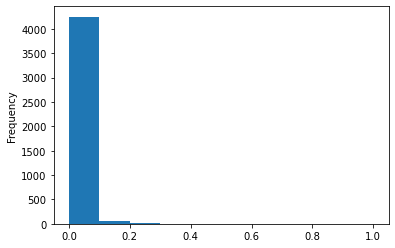

In [12]:
colonies_buffer_idx_popsize['road_idx'].plot(kind='hist')

In [4]:
colonies_buffer_idx_popdensity = gpd.read_file('colonies_psi_3km_buffer_popdensity.shp')

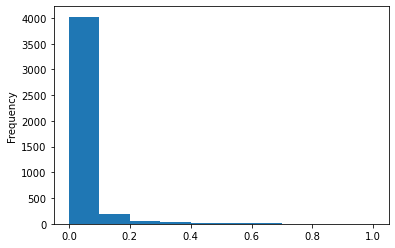

In [13]:
colonies_buffer_idx_popdensity['road_idx'].plot(kind='hist')